# Analysis of the relationship between cast and movie revenue

In [237]:
import pandas as pd
import json
import re

import matplotlib.pyplot as plt
import numpy as np

In [238]:
# load file
df = pd.read_csv('../../../data/processed/movie_stats/movie_stats.csv')

In [239]:
df.head()

,Unnamed: 0,movie_name,imdb_id,cast,direction,production_companies,movie_budget,movie_revenue
0,0,Guardians of the Galaxy Vol. 3,tt6791350,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302
1,1,Avengers: Infinity War,tt4154756,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039
2,2,Spider-Man: No Way Home,tt10872600,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111
3,3,Ant-Man and the Wasp: Quantumania,tt10954600,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180
4,4,Black Panther: Wakanda Forever,tt9114286,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154


In [240]:
# get all the cast columns and convert to list
cast_cols = df["cast"].tolist()

# get all movies revenue and convert to list
revenue_cols = df["movie_revenue"].tolist()


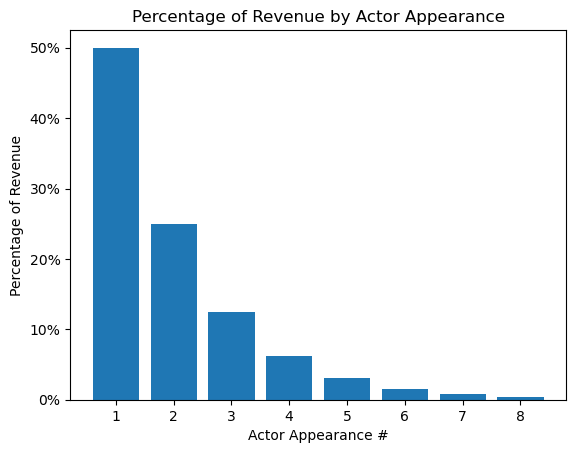

In [269]:
actors = {}

percentages = []
revenues = []

casts = [re.findall(r"'([^,]*?)':", cast) for cast in cast_cols]

for movie_i, cast in enumerate(casts):
    revenue = revenue_cols[movie_i]
    revenues.append(revenue)

    for i in range(len(cast)):
        actor = cast[i]

        # first appearance = 50%, second = 25 %, third = 12.5%, etc.
        percentage = 1 / 2**(i + 1)

        actor_revenue = revenue * percentage

        percentages.append(percentage * 100)

        if actor not in actors:
            actors[actor] = [actor_revenue]
        else:
            actors[actor].append(actor_revenue)

# print(percentages)
# print(sum(percentages))
# plot percentages
cut = 8
plt.bar([i + 1 for i in range(cut)],percentages[:cut])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x))))
plt.title("Percentage of Revenue by Actor Appearance")
plt.xlabel("Actor Appearance #")
plt.ylabel("Percentage of Revenue")
plt.show()

In [270]:
# sum all the revenue for each actor
for actor in actors:
    actors[actor] = np.average(actors[actor])

In [271]:
# sort the actors by revenue
sorted_actors = sorted(actors.items(), key=lambda x: x[1], reverse=True)


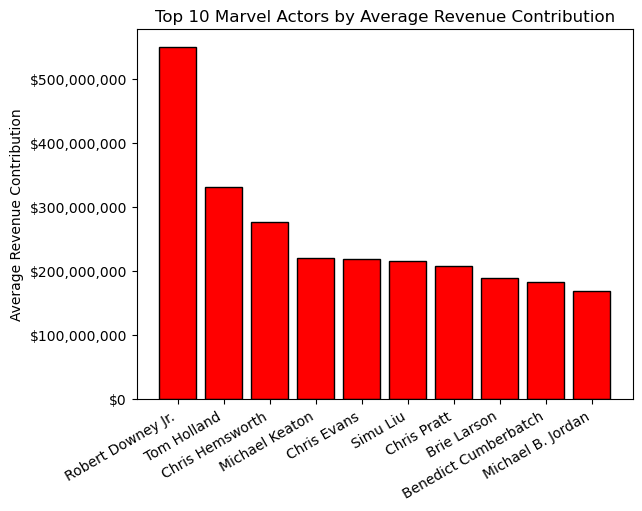

In [272]:
# get the top 10 actors
top_actors = sorted_actors[:10]

# get the names and revenue
names = [actor[0] for actor in top_actors]
revenue = [actor[1] for actor in top_actors]

# barplot in marvel colors
plt.bar(names, revenue, color="red", edgecolor="black", linewidth=1)
plt.xticks(rotation=90)
# y axis in millions of dollars
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.ylabel("Average Revenue Contribution")
# rotate the x labels more horizontally
plt.xticks(rotation=30, ha="right")
# plt.xlabel("Actor")
plt.title("Top 10 Marvel Actors by Average Revenue Contribution")
plt.show()

In [281]:

predicted_revenues = []

for movie_i, cast in enumerate(casts):
    revenue = revenue_cols[movie_i]

    predicted_revenue = 0

    for i in range(len(cast)):
        actor = actors[cast[i]]
        predicted_revenue += actor


    predicted_revenues.append(predicted_revenue)

In [282]:
accuracy = np.average([abs(predicted_revenues[i] - revenue_cols[i]) / revenue_cols[i] for i in range(len(predicted_revenues))])

Average Accuracy: 41.08%


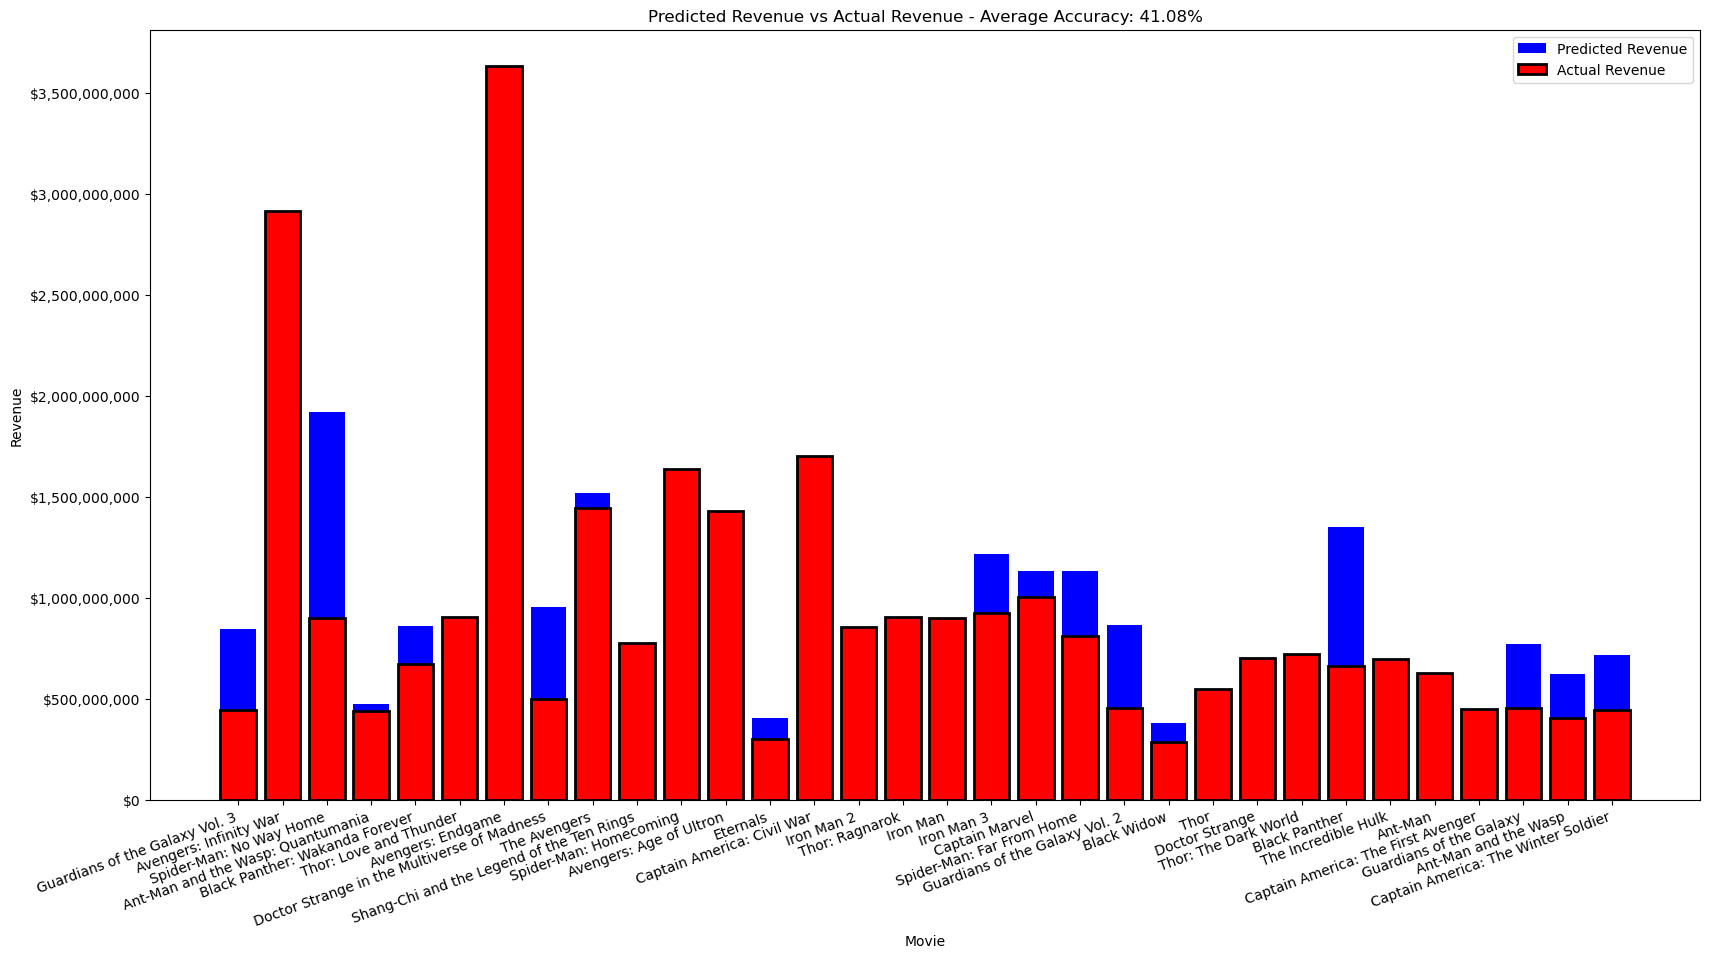

In [291]:
# make a bar plot of the predicted revenue vs actual revenue bars adjacent to each other in blue and red
plt.figure(figsize=(20, 10))
plt.bar(df["movie_name"], revenue_cols, color="blue", linewidth=2)
plt.bar([i for i in range(len(predicted_revenues))], predicted_revenues, color="red", edgecolor="black", linewidth=2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.ylabel("Revenue")
plt.xlabel("Movie")
plt.xticks(rotation=20)
plt.title("Predicted Revenue vs Actual Revenue" + " - Average Accuracy: {:.2f}%".format(accuracy * 100))
plt.legend(["Predicted Revenue", "Actual Revenue"])
plt.show()